In [150]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [151]:
def derivxz(a, y):
    x, z = y
    xdot = -3*x*(1+w+eps*x) - q*x*z
    zdot = -3*z + q*x*z
    return xdot, zdot

In [152]:
# Parameter values
w = -0.5
q = 1
eps = -0.25
# Initial and final scale factor.
a0, af = 0, 20
# Initial conditions: y0 = x0, z0
y0 = 1, 0.1
# Solve the ODEs
solnxz = solve_ivp(derivxz, (a0, af), y0, method='Radau')
print(solnxz.nfev, 'evaluations required.')

195 evaluations required.


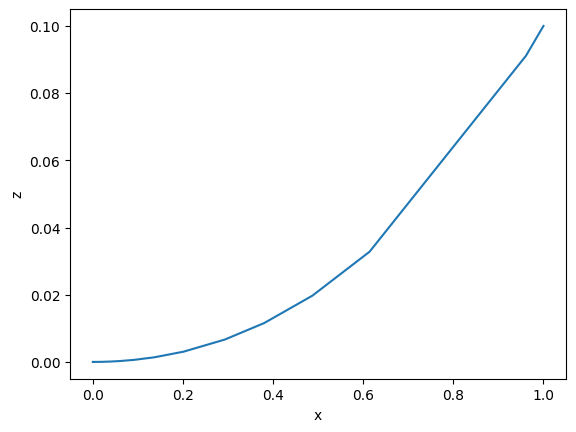

In [153]:
# Plot the x-z solution
plt.plot(solnxz.y[0], solnxz.y[1])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [141]:
def eqn(y):
    ydot = -y**2 - (1/6)*(solnxz.y[0] + solnxz.y[1] + 3*w*solnxz.y[0] + 3*eps*solnxz.y[0]**2)
    return ydot

In [155]:
print(len(eqn(0.2)),
len(solnxz.y[0]),
len(solnxz.y[1]))

26 26 26


In [146]:
def derivxyza(t, y):
    x, y, z, a = y
    xdot = -3*y*x*(1 + w + eps*x) - q*x*y*z
    ydot = -y**2 - (1/6)*(x + z + 3*w*x + 3*eps*x**2)
    zdot = -3*y*z + q*x*y*z
    adot = a*y
    return xdot, ydot, zdot, adot

In [147]:
# Parameter values
w = -0.5
q = 1
eps = -0.25
# Initial and final times.
t0, tf = -50, 50
# Initial conditions: y0 = x0, y0, z0, a0
y0 = 0.1, 0.1, 0.009, 1
# Solve the ODEs
soln = solve_ivp(derivxyza, (t0, tf), y0, method='Radau')
print(soln.nfev, 'evaluations required.')

123 evaluations required.


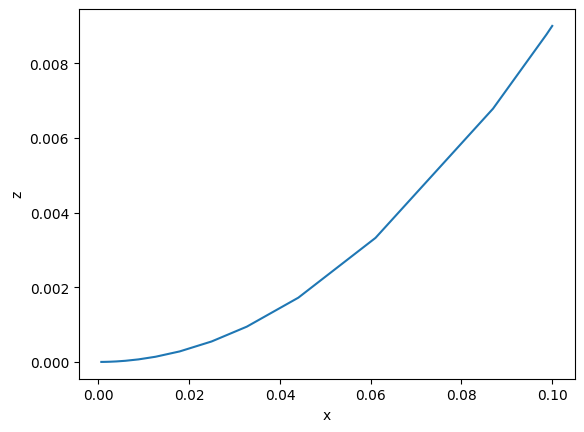

In [148]:
# Plot the x-z solution
plt.plot(soln.y[0], soln.y[2])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

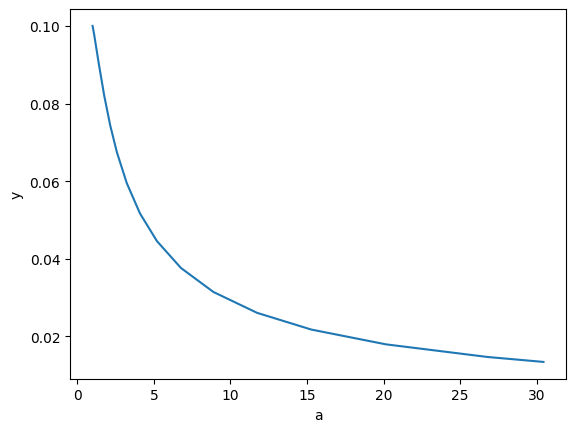

In [149]:
# Plot the a-y solution
plt.plot(soln.y[3], soln.y[1])
plt.xlabel('a')
plt.ylabel('y')
plt.show()